In [9]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
from tensorflow.python.summary.summary_iterator import summary_iterator

In [10]:
def read_all_scalars(log_path):
    ea = event_accumulator.EventAccumulator(log_path,
        size_guidance={
            event_accumulator.SCALARS: 0,
        })
    ea.Reload() # loads events from file
    tags = ea.Tags()["scalars"]
    metrics = {
        
    }
    for tag in tags:
        metrics[tag] = ea.Scalars(tag)

    return metrics
"""

def read_all_scalars(log_path):
    metrics = {
        
    }
    assert os.path.isfile(log_path)
    for event in summary_iterator(log_path):
        for value in event.summary.value:
            metrics[value.tag] = value.simple_value

    return metrics"""

'\n\ndef read_all_scalars(log_path):\n    metrics = {\n        \n    }\n    assert os.path.isfile(log_path)\n    for event in summary_iterator(log_path):\n        for value in event.summary.value:\n            metrics[value.tag] = value.simple_value\n\n    return metrics'

In [11]:
# Set the path to your tensorboard log
scalars = read_all_scalars("../outputs/basic/tf_logs/events.out.tfevents.1616492864.jupyter_amockern.2718.0")
#scalars = read_all_scalars("outputs/vgg_VOC/tf_logs/events.out.tfevents.1583752139.635b80bf57b2.1.0")

In [12]:
print("Possible scalars to plot:")
for tag in scalars.keys():
    print("\t", tag)

Possible scalars to plot:
	 losses/total_loss
	 losses/reg_loss
	 losses/cls_loss
	 lr
	 metrics/mnist_detection_val/mAP
	 metrics/mnist_detection_val/0
	 metrics/mnist_detection_val/1
	 metrics/mnist_detection_val/2
	 metrics/mnist_detection_val/3
	 metrics/mnist_detection_val/4
	 metrics/mnist_detection_val/5
	 metrics/mnist_detection_val/6
	 metrics/mnist_detection_val/7
	 metrics/mnist_detection_val/8
	 metrics/mnist_detection_val/9


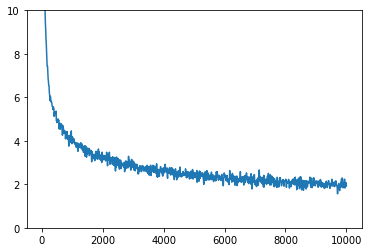

In [13]:
tag_to_plot = "losses/total_loss"
values = scalars[tag_to_plot]
iterations = [val.step for val in values]
values = [val.value for val in values]
plt.ylim([0, 10])
plt.plot(iterations, values)

In [7]:
%load_ext tensorboard

In [8]:
%load_ext tensorboard
%tensorboard --logdir output


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
